In [1]:
from keras.layers import Dense, Dropout, ReLU, Input
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
print(x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [3]:
x_train[50]

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

In [4]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
print(x_train.shape)

(60000, 784)


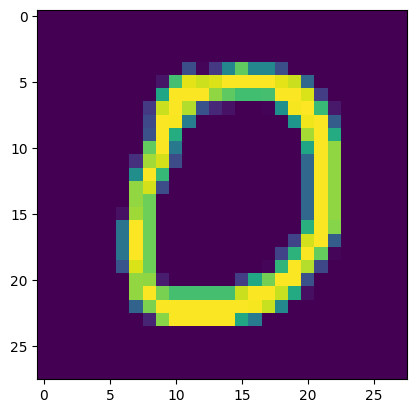

In [6]:
plt.imshow(x_test[10])

In [7]:
#create generator
def create_generator():
    generator = Sequential()
    generator.add(Dense(units=512, input_dim=100))
    generator.add(ReLU())

    generator.add(Dense(units=512))
    generator.add(ReLU())

    generator.add(Dense(units=1024))
    generator.add(ReLU())

    generator.add(Dense(units=784, activation="tanh"))

    generator.compile(
        optimizer=Adam(learning_rate=0.0001, beta_1=0.5),
        loss="binary_crossentropy"
    )

    return generator

In [8]:
#create discriminator
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units=1024, input_dim=784))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))

    discriminator.add(Dense(units=512))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))

    discriminator.add(Dense(units=256))
    discriminator.add(ReLU())

    discriminator.add(Dense(units=1, activation="sigmoid"))

    discriminator.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001, beta_1=0.5))
    return discriminator

In [9]:
g = create_generator()
print(g.summary())
d = create_discriminator()
d.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 re_lu_1 (ReLU)              (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 re_lu_2 (ReLU)              (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 784)               8

In [10]:
def create_gan(discriminator, generator):

    discriminator.trainable = False
    gan_input = Input(shape=(100,))
    x=generator(gan_input)
    gan_output=discriminator(x)
    gan=Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss="binary_crossentropy", optimizer="adam")
    return gan

gan = create_gan(d, g)
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 784)               1643280   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 3103505 (11.84 MB)
Trainable params: 1643280 (6.27 MB)
Non-trainable params: 1460225 (5.57 MB)
_________________________________________________________________


In [15]:
epochs=25
batch_size=256

for e in range(epochs):
    for _ in range(batch_size):
        noise = np.random.normal(0,1, [batch_size,100])
        generated_images = g.predict(noise)
        image_batch = x_train[np.random.randint(low=0, high=x_train.shape[0], size=batch_size)]
        x = np.concatenate([image_batch, generated_images])
        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 1

        d.trainable = True
        d.train_on_batch(x, y_dis)
        noise = np.random.normal(0,1, [batch_size, 100])
        y_gen = np.ones(batch_size)
        d.trainable = False
        gan.train_on_batch(noise, y_gen)
    print("epochs:", e)

g.save_weights("gans_model.h5")




Görüntülenen çıkış son 5000 satıra kısaltıldı.
8/8 [==============================] - 0s 11ms/step
epochs: 5
8/8 [==============================] - 0s 8ms/step
epochs: 6
8/8 [==============================] - 0s 6ms/step
epochs: 7
8/8 [==============================] - 0s 6ms/step
epochs: 8
8/8 [==============================] - 0s 12ms/step
epochs: 9
8/8 [==============================] - 0s 10ms/step
epochs: 10
8/8 [==============================] - 0s 13ms/step
epochs: 11
8/8 [==============================] - 0s 8ms/step
epochs: 12
8/8 [==============================] - 0s 8ms/step
epochs: 13
8/8 [==============================] - 0s 10ms/step
epochs: 14
8/8 [==============================] - 0s 10ms/step
epochs: 15
8/8 [==============================] - 0s 8ms/step
epochs: 16
8/8 [==============================] - 0s 10ms/step
epochs: 17
8/8 [==============================] - 0s 10ms/step
epochs: 18
8/8 [==============================] - 0s 7ms/step
epochs: 19
8/8 [===============

4/4 [==============================] - 0s 10ms/step


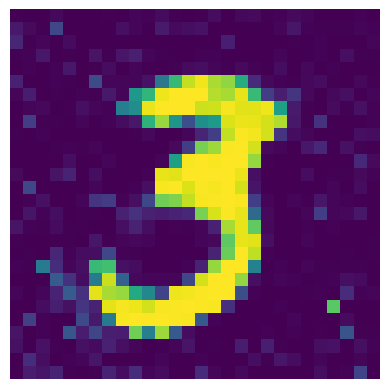

In [17]:
noise = np.random.normal(loc=0, scale=1, size=[100,100])
generated_images = g.predict(noise)
generated_images = generated_images.reshape(100,28,28)
plt.imshow(generated_images[50], interpolation='nearest')
plt.axis('off')
plt.show()